# <font color='blue'>Lending Club Case Study Intro

**This project aims to analyze loan data and understand the borrowers behaviour and likely to default.Lending Club offers loans to borrowers, but many borrowers default, meaning they fail to repay the borrowed amount along with the accrued interest to the lenders.These defaults lead to financial losses for businesses or lenders.

*Therefore, the aim of this case study is to identify key factors that can help in understanding which borrowers are more likely to default.




## <font color='blue'>Import Libraries</font>


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## <font color='blue'> Import data</font> 


In [53]:
df_loan = pd.read_csv("loan.csv", low_memory=False)
df_colums = pd.read_excel("Data_Dictionary.xlsx")

In [54]:
df_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_colums #all column definitions 

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN



# <font color='blue'>Clean the data</font>

### Check whether all columns are present in both loan and loan column definition dataset

In [56]:
df_colums=df_colums.dropna(1,"all")#remove null collums in the data

TypeError: DataFrame.dropna() takes 1 positional argument but 3 were given

In [57]:
set(df_loan.columns) - set(df_colums["LoanStatNew"]) #difference of columns in given data and columns defined data

{'total_rev_hi_lim', 'verification_status_joint'}

<b>Drop the columns which are not present in the data definition as they might not be useful

In [58]:
df_loan=df_loan.drop(['total_rev_hi_lim', 'verification_status_joint'],1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

<b>Drop all the columns where all the values are null

In [59]:
df_loan=df_loan.dropna(1,how="all")

TypeError: DataFrame.dropna() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

<b> Shape of the data after dropping the columns 

In [60]:
df_loan.shape

(39717, 111)

<b> Check total number of nulls present in each column

In [61]:
df_loan.isna().sum()[df_loan.isna().sum() > 0] 

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

<b>Remove outliers (remove columns that have more null values)

<Axes: >

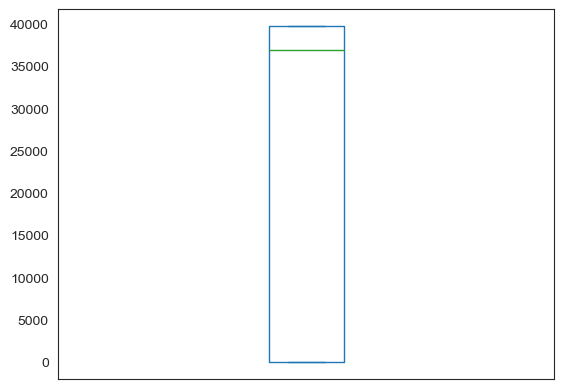

In [62]:
df_loan.isna().sum().plot.box()  #by this we will know the columns that have more null values

<i><b>All these columns are having high null values -> 'desc' 'mths_since_last_record' 'next_pymnt_d' 'mths_since_last_delinq' 

In [63]:
df_loan=df_loan.drop(['desc','mths_since_last_record','next_pymnt_d','mths_since_last_delinq'],1) # drop all outliers in box plot

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

<b>Drop all rows that have high null values in the columns 'pub_rec_bankruptcies' 'emp_title' 'emp_length'

In [64]:
df_loan=df_loan[~df_loan.pub_rec_bankruptcies.isna()]

In [65]:
df_loan=df_loan[~df_loan.emp_title.isna()]

In [66]:
df_loan = df_loan[~df_loan["emp_length"].isna()] # removing null values 

<b>Left over null values

In [67]:
df_loan.isna().sum()[df_loan.isna().sum() > 0] 

desc                          12066
title                             9
mths_since_last_delinq        24014
mths_since_last_record        34649
revol_util                       46
                              ...  
percent_bc_gt_75              36548
tot_hi_cred_lim               36548
total_bal_ex_mort             36548
total_bc_limit                36548
total_il_high_credit_limit    36548
Length: 63, dtype: int64

In [68]:
df_loan.shape 

(36548, 111)

<b>List of Columns left for analysis 

In [69]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


# <font color='blue'>Data Analysis</font>
## <font color='blue'>Univariate analysis</font>
### <b>Understand the columns --> Remove Outliners--> Perform Univariant analysis whever required</b>


In [70]:
df_loan["id"]= df_loan["id"].astype('string')

member_id : A unique LC assigned Id for the borrower member. 
given data type is int. convert it to string as it should not be updated

In [71]:
df_loan["member_id"] = df_loan["member_id"].astype('string')

***loan_amnt*** : The listed amount of the loan applied for by the borrower

In [72]:
df_loan["loan_amnt"].describe()

count    36548.000000
mean     11294.866340
std       7435.395805
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

C:\Users\KSREEHARSHA\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


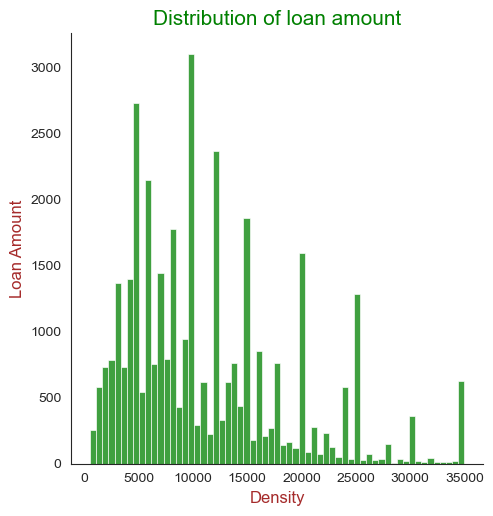

In [73]:
#ploting the graph 
sns.set_style("white")
sns.displot(df_loan.loan_amnt, color="green")

# Labeling Axes
plt.xlabel("Density", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

# Adding and formatting title
plt.title("Distribution of loan amount", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

<font color='Blue'>***Insights***</font>

+ Loans applied are between 500 and 35000 
+ By analyzing this graph,  we understand that most of the loan borrowers need money under 15000
+ Majority of borrowers asked for rounded number i.e., 5000 / 10,000

<b>funded_amnt </b> : The total amount committed to that loan at that point in time. It lies between 500 and 35000


In [74]:
df_loan["funded_amnt"].describe()

count    36548.000000
mean     11020.644769
std       7168.173439
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

<b>derived matrix </b>: New column added with name loan_approval = percentage of money funded to them out of what they asked 


In [75]:
df_loan["loan_approval"] = df_loan["funded_amnt"]/df_loan["loan_amnt"]*100

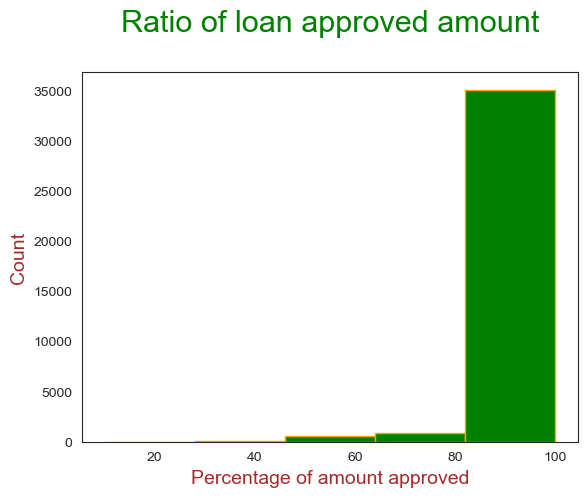

In [76]:
# plot bar chart
plt.hist(df_loan["loan_approval"], bins=5, align='mid', edgecolor='Orange',color='green')

# Format the title
plt.title("Ratio of loan approved amount\n", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'Green'})

# add Labeles to X and Y axis
plt.xlabel("Percentage of amount approved", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='blue'>***Insights***</font> 

+ Majority of the people were funded 

<b>funded_amnt_inv</b> : The total amount committed by investors against the loan at that point of time
    
 

In [77]:
df_loan["funded_amnt_inv"].describe()

count    36548.000000
mean     10586.433390
std       7073.216233
min          0.000000
25%       5000.000000
50%       9175.000000
75%      14500.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [78]:
zero_inv=df_loan[df_loan["funded_amnt_inv"] == 0] # there are 129 row with 0

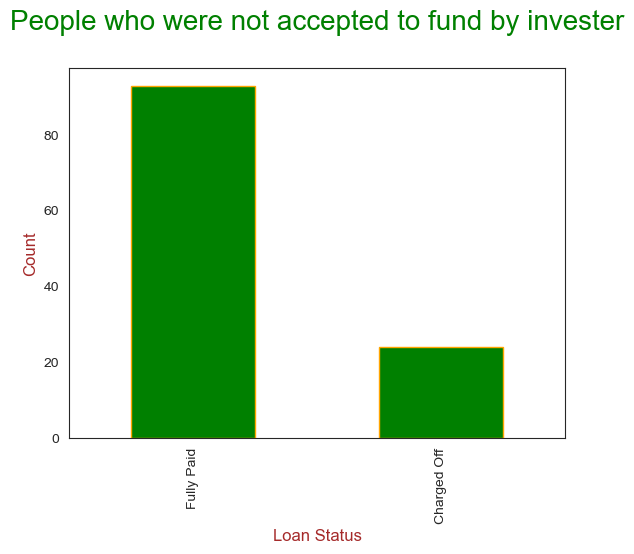

In [79]:
# plot bar chart 
zero_inv.loan_status.value_counts().plot.bar(align='center', edgecolor='Orange',color='green')

plt.title("People who were not accepted to fund by invester\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='blue'>***Insights***</font>
 
  + Funded amount lies between 0 to 35000 but there are 129 records with 0 funded amount. which means inverstors didn't invest for these 129

***term*** : The number of payments on the loan. Values are in months and can be either 36 or 60. 
 

In [80]:
df_loan["term"].value_counts()

term
 36 months    26471
 60 months    10077
Name: count, dtype: int64

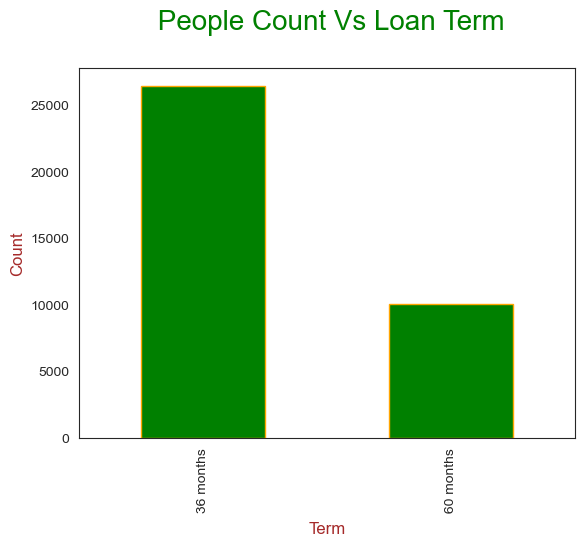

In [81]:
# plot bar chart
df_loan["term"].value_counts().plot.bar(align='center', edgecolor='Orange',color='green')

plt.title(" People Count Vs Loan Term\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='blue'>***Insights***</font>
+ There are two values 36 and 60 months. by analyzing, we can say majority of the people took 36 months tenure

<b>int_rate</b> : Interest Rate on the loan 
 

In [82]:
df_loan["int_rate"].value_counts() #we have to fix the data type string -> float

int_rate
10.99%    901
13.49%    787
11.49%    772
7.51%     732
7.88%     674
         ... 
24.40%      1
22.94%      1
13.84%      1
16.96%      1
11.22%      1
Name: count, Length: 334, dtype: int64

In [83]:
def remove_last_char_tofloat(x): # create a generic function to remove '%' and convert to flaot
    x = x[:-1]
    return float(x) 

In [84]:
#apply the function to columns
df_loan["int_rate"]=df_loan["int_rate"].apply(remove_last_char_tofloat)

In [85]:
df_loan["int_rate"].dtype

dtype('float64')

In [86]:
df_loan["int_rate"].describe()

count    36548.000000
mean        12.081942
std          3.735718
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

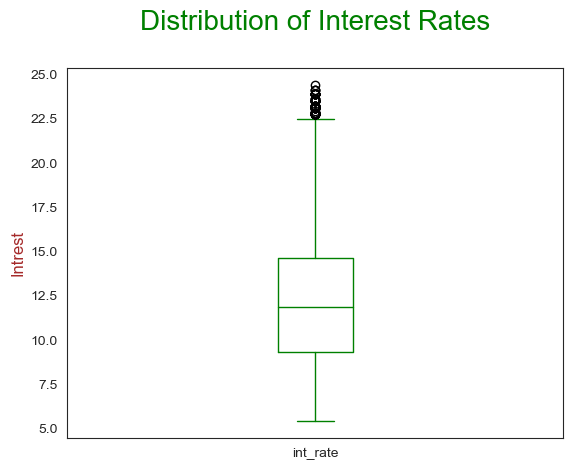

In [87]:

# plott bar chart
df_loan["int_rate"].plot.box(color='green')

plt.title("Distribution of Interest Rates\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.ylabel("Intrest", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='blue'>Insights</font>
 + Intrest rate lies between 5% and 24% 
 + High interest implies high risk and vice versa 
 + Majority of the people are in between 10 and 15 percent interest rate
    

<b>installment<b> : The monthly payment owed by the borrower if the loan originates.

In [88]:
df_loan["installment"].describe()

count    36548.000000
mean       325.860813
std        207.420129
min         16.080000
25%        168.730000
50%        282.955000
75%        431.682500
max       1305.190000
Name: installment, dtype: float64

In [89]:
df_loan= df_loan[df_loan["installment"] < 700] ## removing the ouliers 

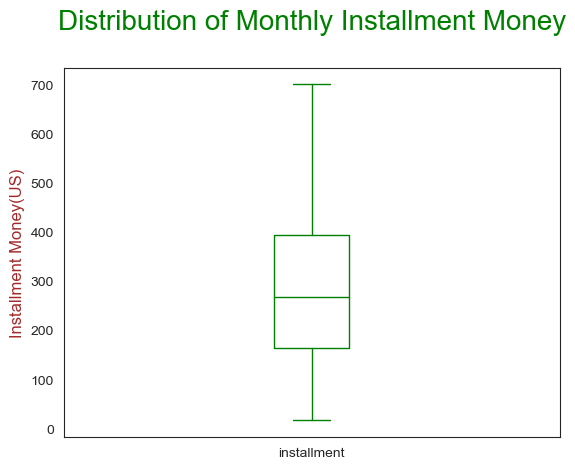

In [90]:
# plotting bar chart and setting bar aligning it to center
df_loan["installment"].plot.box(color='green')

# Adding and formatting title
plt.title("Distribution of Monthly Installment Money\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.ylabel("Installment Money(US)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='blue'>Insights</font>
  + Installment lies between 15 and 1305 where 75 percentile data lies under 430 =>there are some outliers who are paying high amount in one installment
  + IQR(Inter quartile range) is 263 
  + Majority of the people have monthly installment between 160 and 430 


<b>grade : LC assigned loan grade

In [91]:
df_loan["grade"].value_counts()

grade
B    10436
A     8986
C     7132
D     4482
E     2267
F      765
G      216
Name: count, dtype: int64

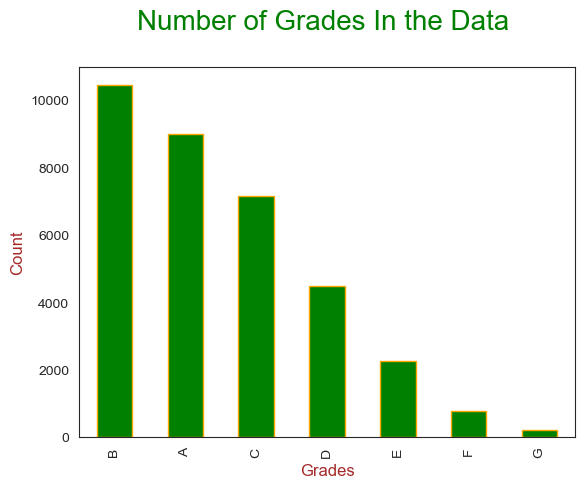

In [92]:
# plot bar chart
df_loan["grade"].value_counts().plot.bar(align='center', edgecolor='Orange',color='green')

plt.title("Number of Grades In the Data \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.xlabel("Grades", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='blue'>Analysis</font>
 + B grade loans are nearly 12020 which is the highest number of loan given

***sub_grade*** : LC assigned loan subgrade


In [93]:
df_loan["sub_grade"].value_counts()

sub_grade
A4    2576
B3    2498
A5    2461
B5    2377
B4    2183
C1    1847
C2    1790
B2    1783
A3    1608
B1    1595
C3    1376
A2    1336
D2    1166
C4    1085
C5    1034
A1    1005
D3     996
D4     819
D1     779
D5     722
E1     628
E2     541
E3     445
E4     358
E5     295
F1     244
F2     192
F3     136
F4     119
F5      74
G1      69
G2      53
G4      42
G3      34
G5      18
Name: count, dtype: int64

<font color='blue'>***Insights***</font>
+ Each grade is again divided into 5 subgrades like A1,A2,A3,A4,A5

***emp_title*** : The job title of the person applying for the loan.

In [94]:
df_loan["emp_title"].value_counts()

emp_title
US Army                                117
Bank of America                        104
IBM                                     56
Wells Fargo                             52
AT&T                                    52
                                      ... 
Jessamine County Board of Education      1
First Health Montgomery Hospital         1
Aegir Systems                            1
Intermark Group                          1
Fairfield Manufacturing                  1
Name: count, Length: 26769, dtype: int64

In [95]:
df_loan["emp_title"].isna().sum()

0

In [96]:
df_loan["emp_title"].value_counts().describe()

count    26769.000000
mean         1.280735
std          1.925864
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        117.000000
Name: count, dtype: float64

<font color='blue'>***Insights***</font>
  + Majority of the people are from different companies and 75 percentile of data are unique, so we cannot find much insights from this data 

<b>emp_length<b> : Employment length in years.


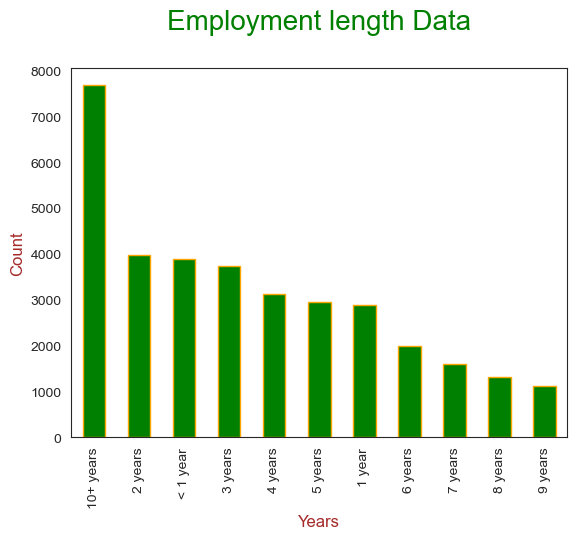

In [97]:
# plotting bar chart and setting bar aligning it to center
df_loan["emp_length"].value_counts().plot.bar(align='center', edgecolor='Orange',color='green')

# Adding and formatting title
plt.title("Employment length Data\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [98]:
def clean_emp_year(x):
    x =  x.replace("years" , "")
    x =  x.replace("year" , "")
    x = x.replace("< 1" , "0")
    x = x.replace("+" , "")
    return int(x) 

In [99]:
df_loan["emp_length"] = df_loan["emp_length"].apply(clean_emp_year)#cleaning the data 

<font color='blue'>***Insights***</font>

+ Possible values are between 0 and 10 where 0 denotes less than one year and 10 denotes ten or more years. 
+ 1075 null values are present
+ From the graph we can see that people having 10+ year experience are majority of applicants of the loan 

***home_ownership*** : The home ownership status provided by the borrower during registration. 


In [100]:
df_loan = df_loan[~(df_loan["home_ownership"] == "NONE")]# droping the rows with none

In [101]:
df_loan = df_loan[~(df_loan["home_ownership"] == "OTHER")]# droping the rows with Other value

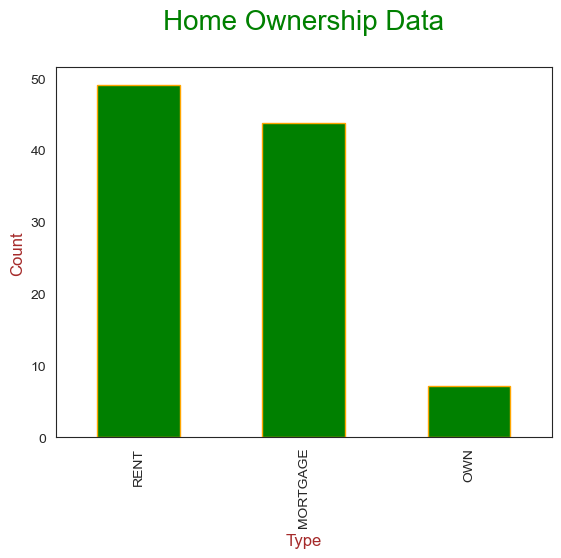

In [102]:
# plotting bar chart and setting bar aligning it to center
df_loan["home_ownership"].value_counts().apply(lambda x : x /df_loan["home_ownership"].shape[0]*100).plot.bar(align='center', edgecolor='Orange',color='green')

# Adding and formatting title
plt.title("Home Ownership Data\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='blue'>***Insights***</font>
  + Majority of the people who applied for the loan are living on rent or mortgage
  + This implies that 80% are not having full home ownership

***annual_inc*** : The self-reported annual income provided by the borrower during registration.
+ Maximum is very high and there are two oultlier (tis will miss-lead us)
+ So we can drop these records highter than > 30 lakhs 

In [103]:
df_loan["annual_inc"].max()

6000000.0

In [104]:
df_loan["annual_inc"].min()

4000.0

<Axes: >

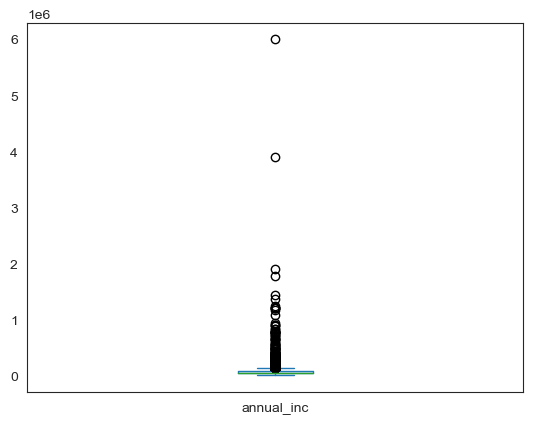

In [105]:
df_loan["annual_inc"].plot.box()

In [106]:
df_loan.shape # before droping the values

(34192, 112)

In [107]:
np.percentile(df_loan["annual_inc"],90)

109000.0

In [108]:
df_loan = df_loan[df_loan["annual_inc"] < 116000.0] # after droping the values 

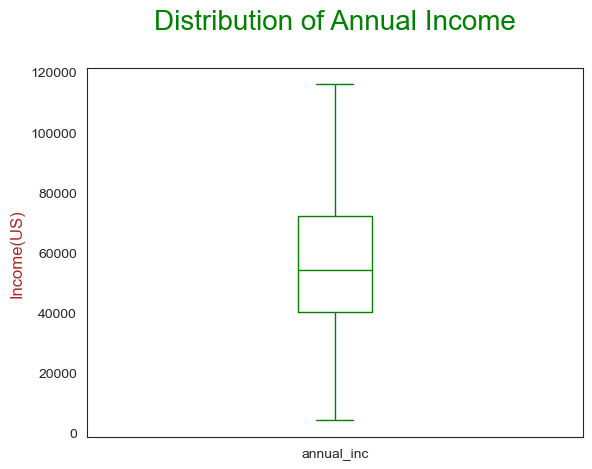

In [109]:
# plotting bar chart and setting bar aligning it to center
df_loan["annual_inc"].plot.box(color='green')

# Adding and formatting title
plt.title("Distribution of Annual Income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.ylabel("Income(US)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='blue'>***Insights***</font>
+ Majority of the people's annual income lies between 40000 and 80000

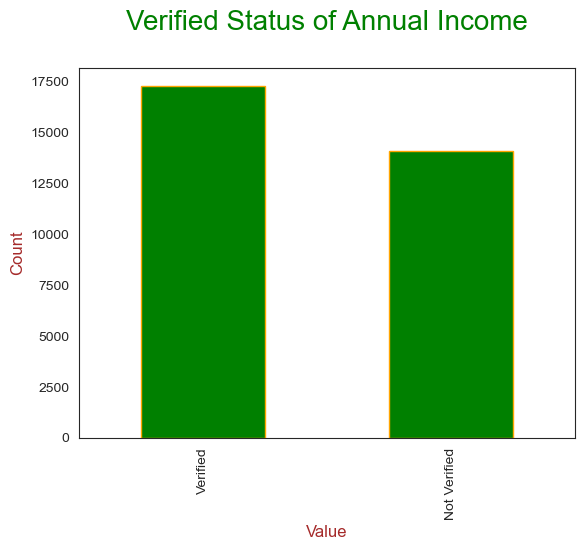

In [110]:
# plotting bar chart
df_loan["verification_status"].apply(lambda x : "Verified" if x == "Source Verified" else x).value_counts().plot.bar(align='center', edgecolor='Orange',color='green')

plt.title("Verified Status of Annual Income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.xlabel("Value", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='blue'>***Insights***</font>
  + Majority of the data for income is verified(65%)
  + But nearly 35% data about income is not verfied
  + Changed the values of source verified to verified (because end of the day they are atleast verified)

***issue_d*** : The month in which the loan was funded

In [111]:
df_loan["issue_d"].value_counts()

issue_d
Dec-11    1819
Nov-11    1719
Sep-11    1589
Oct-11    1588
Aug-11    1521
Jul-11    1505
Jun-11    1458
May-11    1384
Apr-11    1261
Mar-11    1145
Jan-11    1143
Feb-11    1031
Dec-10    1025
Jul-10     960
Nov-10     937
Oct-10     928
Aug-10     919
Sep-10     905
Jun-10     869
May-10     752
Apr-10     671
Mar-10     574
Feb-10     487
Nov-09     461
Jan-10     427
Dec-09     427
Oct-09     417
Sep-09     383
Aug-09     348
Jul-09     309
Jun-09     305
May-09     268
Mar-09     249
Apr-09     245
Feb-09     222
Jan-09     202
Dec-08     179
Nov-08     154
Apr-08     130
Mar-08      99
Oct-08      77
Jul-08      74
May-08      63
Aug-08      61
Jun-08      56
Sep-08      27
Feb-08       6
Jan-08       6
Dec-07       2
Aug-07       2
Nov-07       1
Oct-07       1
Name: count, dtype: int64

In [112]:
df_loan["issue_d_month"]=df_loan["issue_d"].apply(lambda x : x[:3])

In [113]:
df_loan["issue_d_year"] = df_loan["issue_d"].apply(lambda x : x[4:])

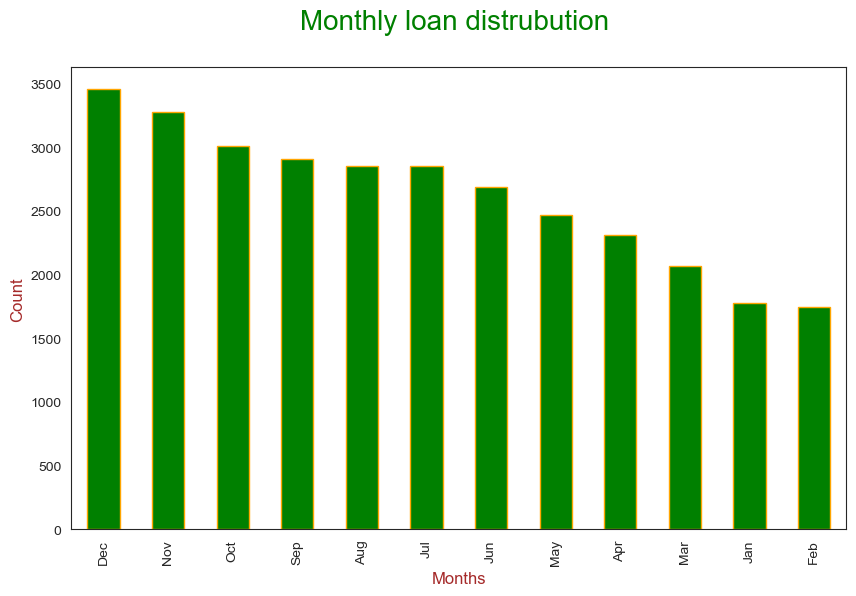

In [114]:
plt.figure(figsize = (10,6))

# plotting bar chart
df_loan["issue_d_month"].value_counts().plot.bar(align='center', edgecolor='Orange',color='green')

plt.title("Monthly loan distrubution \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.xlabel("Months", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

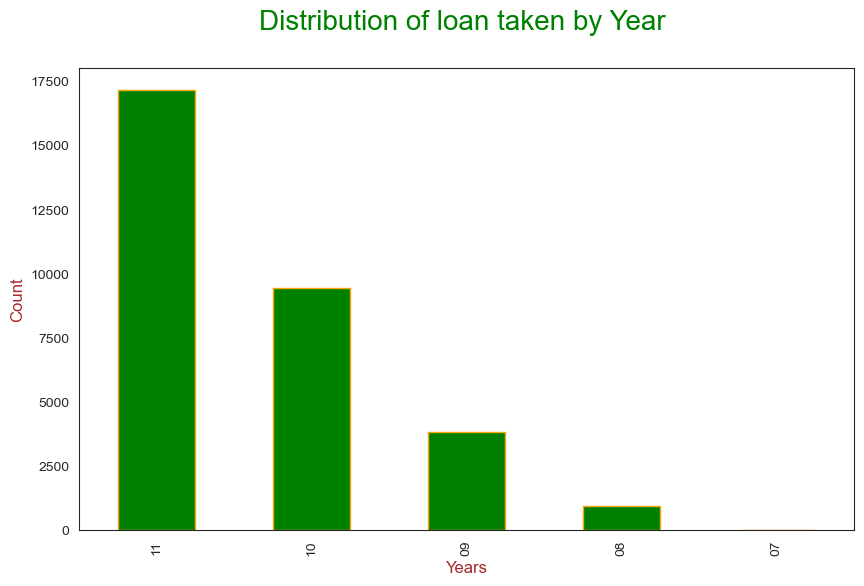

In [115]:
plt.figure(figsize = (10,6))

# plotting bar chart
df_loan["issue_d_year"].value_counts().plot.bar(align='center', edgecolor='Orange',color='green')

plt.title("Distribution of loan taken by Year \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.xlabel("Years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

***loan_status*** : Current status of the loan


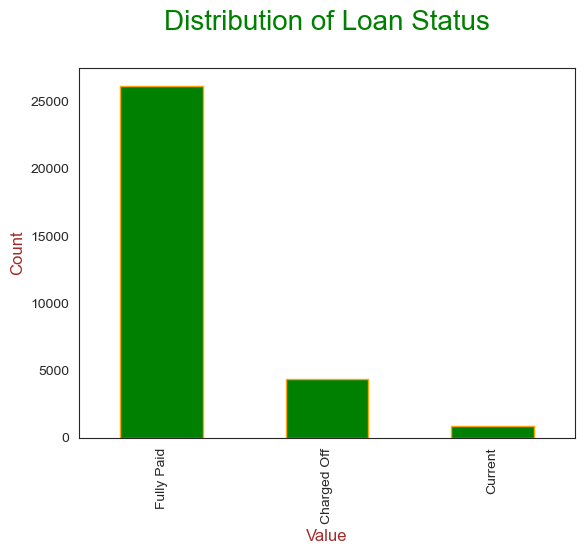

In [116]:
# plotting bar chart and setting bar aligning it to center
df_loan["loan_status"].value_counts().plot.bar(align='center', edgecolor='Orange',color='green')

# Adding and formatting title
plt.title("Distribution of Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Value", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [117]:
df_loan=df_loan[df_loan["loan_status"] != "Current"] 
#removing the current values rows because they can pay full ammount so we can't find much Insigths

In [118]:
df_loan["pymnt_plan"].value_counts()

pymnt_plan
n    30517
Name: count, dtype: int64

In [119]:
df_loan = df_loan.drop("pymnt_plan" ,1)
df_loan.shape

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [120]:
df_loan["url"][1]

'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430'

In [121]:
df_loan = df_loan.drop("url",1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [122]:
df_loan.shape

(30517, 114)

***purpose*** : A category provided by the borrower for the loan request. 
+ different categorys like wedding,car etc  
+ 14 distict categorys 

In [123]:
df_loan["purpose"].value_counts()

purpose
debt_consolidation    14575
credit_card            3954
other                  3120
home_improvement       2036
major_purchase         1765
car                    1293
small_business         1071
wedding                 773
medical                 553
moving                  465
vacation                311
house                   273
educational             256
renewable_energy         72
Name: count, dtype: int64

In [124]:
df_loan = df_loan[~(df_loan["purpose"] == "renewable_energy")] # removing minimum number of columns

In [125]:
df_loan["title"].value_counts().describe()

count    15455.000000
mean         1.969330
std         19.349917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1675.000000
Name: count, dtype: float64

In [126]:
df_loan = df_loan.drop("title",1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

***zip_code*** :  The first 3 numbers of the zip code provided by the borrower in the loan application.

In [127]:
df_loan["zip_code"].value_counts()

zip_code
112xx    413
945xx    410
606xx    407
100xx    397
070xx    348
        ... 
736xx      1
332xx      1
461xx      1
093xx      1
479xx      1
Name: count, Length: 797, dtype: int64

In [128]:
df_loan["addr_state"].value_counts().describe()

count      49.000000
mean      621.326531
std       927.139404
min         1.000000
25%       123.000000
50%       351.000000
75%       660.000000
max      5383.000000
Name: count, dtype: float64

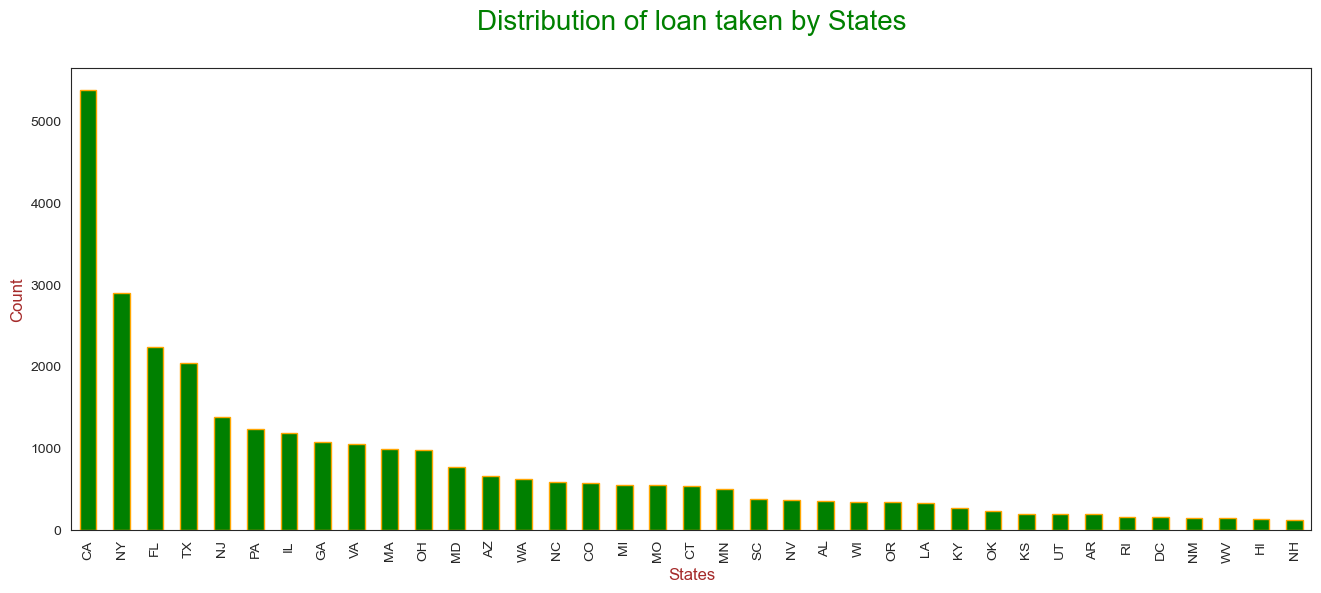

In [129]:
plt.figure(figsize = (16,6))

# plotting bar chart and setting bar aligning it to center
df_loan["addr_state"].value_counts()[df_loan["addr_state"].value_counts() > 117].plot.bar(align='center', edgecolor='Orange',color='green')

# Adding and formatting title
plt.title("Distribution of loan taken by States\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("States", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

***dti*** :A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [ ]:
df_loan["dti"].describe()

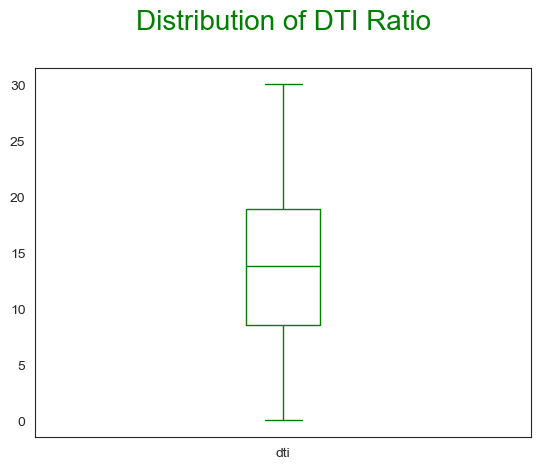

In [130]:
# plotting bar chart and setting bar aligning it to center
df_loan["dti"].plot.box(color='green')

# Adding and formatting title
plt.title("Distribution of DTI Ratio\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})


plt.show()

<font color='blue'>***Insights***</font>:
 + Here dti ratio lies between 0 to 29.0
 + Where as maximum dti ratio lies between 10 to 20 

***delinq_2yrs*** : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [131]:
df_loan["delinq_2yrs"].describe()

count    30445.000000
mean         0.143340
std          0.489895
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [132]:
df_loan["delinq_2yrs"].value_counts()

delinq_2yrs
0     27217
1      2478
2       507
3       164
4        45
5        17
6        10
7         4
8         2
11        1
Name: count, dtype: int64

In [133]:
df_loan["earliest_cr_line"].value_counts()

earliest_cr_line
Oct-99    302
Nov-98    296
Dec-98    284
Oct-00    283
Nov-00    276
         ... 
Dec-50      1
Jan-68      1
Aug-73      1
Aug-68      1
Jan-72      1
Name: count, Length: 497, dtype: int64

In [134]:
df_loan["earliest_cr_line_year"]=df_loan["earliest_cr_line"].apply(lambda x : x[-2:])

In [135]:
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].apply(lambda x : x[:3])

<Axes: xlabel='earliest_cr_line'>

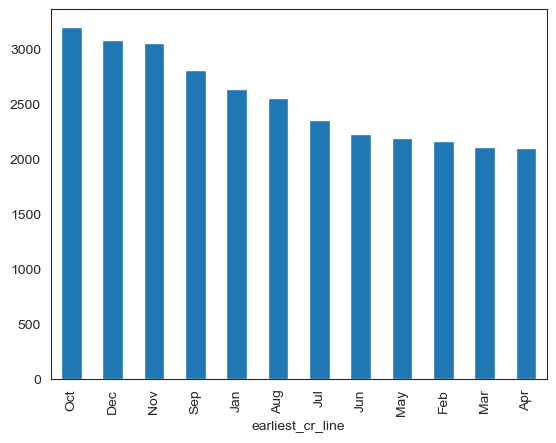

In [136]:
df_loan["earliest_cr_line"].value_counts().plot.bar()

<Axes: xlabel='inq_last_6mths'>

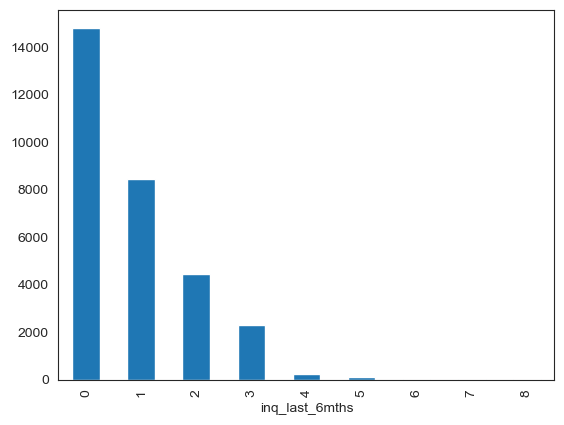

In [137]:
df_loan["inq_last_6mths"].value_counts().plot.bar()

In [138]:
df_loan["open_acc"].describe()

count    30445.000000
mean         9.071375
std          4.278636
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         38.000000
Name: open_acc, dtype: float64

In [139]:
df_loan["revol_util"].value_counts()

revol_util
0%        701
46.40%     50
61%        49
32%        49
31.20%     48
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1073, dtype: int64

In [140]:
df_loan["revol_util"].apply(lambda x : x if type(x) == float else float(x[:-1]) )

1         9.4
3        21.0
5        28.3
6        85.6
7        87.5
         ... 
39551    96.5
39562    68.7
39623    62.9
39666    34.3
39680    70.9
Name: revol_util, Length: 30445, dtype: float64

In [141]:
df_loan["total_acc"].value_counts()

total_acc
14    1192
15    1187
17    1181
13    1160
16    1156
      ... 
81       1
78       1
72       1
87       1
2        1
Name: count, Length: 77, dtype: int64

In [142]:
df_loan["initial_list_status"].value_counts()

initial_list_status
f    30445
Name: count, dtype: int64

In [143]:
df_loan=df_loan.drop("initial_list_status",1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [144]:
df_loan.shape #current shape ofter droping the columns

(30445, 115)

In [145]:
df_loan["out_prncp"].value_counts()

out_prncp
0.0    30445
Name: count, dtype: int64

In [146]:
df_loan=df_loan.drop("out_prncp_inv",1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [147]:
df_loan.shape # current shape ofter droping the columns

(30445, 115)

In [148]:
df_loan["out_prncp"].value_counts()

out_prncp
0.0    30445
Name: count, dtype: int64

In [149]:
df_loan=df_loan.drop("total_pymnt_inv",1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [150]:
df_loan.shape # current shape ofter droping the columns

(30445, 115)

In [151]:
df_loan=df_loan.drop("total_rec_prncp",1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [152]:
df_loan.shape # current shape ofter droping the columns

(30445, 115)

In [153]:
df_loan["total_rec_int"].value_counts()

total_rec_int
0.00       59
1196.57    23
1784.23    15
717.95     15
1148.14    14
           ..
21.50       1
1459.31     1
3027.73     1
240.40      1
579.66      1
Name: count, Length: 27094, dtype: int64

In [154]:
df_loan["total_rec_late_fee"].value_counts()

total_rec_late_fee
0.000000     28930
15.000000      201
15.000000       48
30.000000       42
15.000000       38
             ...  
23.230000        1
29.955775        1
14.930384        1
19.940000        1
52.262227        1
Name: count, Length: 952, dtype: int64

In [155]:
df_loan[df_loan["recoveries"] > 0]["recoveries"].describe()

count     3269.000000
mean       718.601502
std       1466.019008
min          6.300000
25%        101.320000
50%        299.310000
75%        710.020000
max      21810.310000
Name: recoveries, dtype: float64

In [156]:
df_loan["collection_recovery_fee"].value_counts()

collection_recovery_fee
0.0000      27521
2.0000         10
1.2000          9
1.6900          8
0.8000          8
            ...  
155.0340        1
4.1815          1
340.0000        1
258.9138        1
668.3600        1
Name: count, Length: 2048, dtype: int64

In [157]:
df_loan["last_pymnt_d"].value_counts()

last_pymnt_d
Mar-13    826
Dec-14    756
May-13    730
Feb-13    698
Mar-12    695
         ... 
Aug-08      5
Sep-08      5
May-08      4
Nov-08      4
Jun-08      2
Name: count, Length: 97, dtype: int64

In [158]:
df_loan["last_pymnt_d_year"]=df_loan["last_pymnt_d"].apply(lambda x : x if type(x) == float else x[-2:])

In [159]:
df_loan["last_pymnt_d"]=df_loan["last_pymnt_d"].apply(lambda x : x if type(x) == float else x[:3])


<Axes: xlabel='last_pymnt_d'>

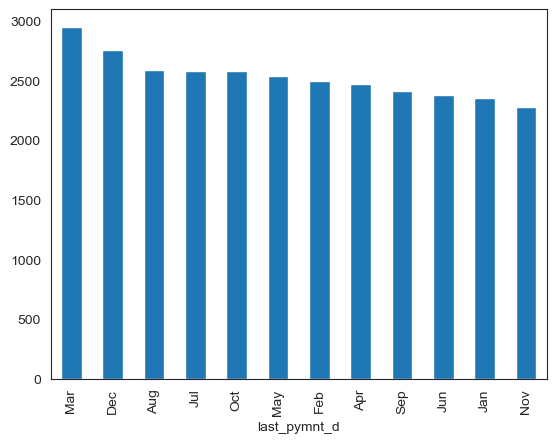

In [160]:
df_loan["last_pymnt_d"].value_counts().plot.bar()

<font color='blue'>***Insights***</font>
  + In a calendar year, during May month, more people payed their last month payment 

In [161]:
df_loan["last_pymnt_amnt"].describe()

count    30445.000000
mean      2394.332158
std       3743.515735
min          0.000000
25%        207.570000
50%        508.780000
75%       3160.730000
max      30340.500000
Name: last_pymnt_amnt, dtype: float64

In [162]:
df_loan=df_loan.drop("collections_12_mths_ex_med",1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [163]:
df_loan.shape # current shape ofter droping the columns

(30445, 116)

In [164]:
df_loan=df_loan.drop("policy_code",1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [165]:
df_loan.shape # current shape ofter droping the columns

(30445, 116)

In [166]:
df_loan=df_loan.drop("application_type",1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [167]:
df_loan.shape # current shape ofter droping the columns

(30445, 116)

In [168]:
df_loan=df_loan.drop("acc_now_delinq",1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [169]:
df_loan=df_loan.drop('chargeoff_within_12_mths',1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [170]:
df_loan=df_loan.drop('delinq_amnt',1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [171]:
df_loan=df_loan.drop('tax_liens',1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [172]:
df_loan.shape # current shape ofter droping the columns

(30445, 116)

In [173]:
Customer_behaviour_data = ['delinq_2yrs', "earliest_cr_line" ,'earliest_cr_line_year' , "inq_last_6mths" , "open_acc"  , "pub_rec" , "revol_bal" , 
                            "revol_util", "total_acc","out_prncp","total_pymnt","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
                                "last_pymnt_d",'last_pymnt_d_year',"last_pymnt_amnt","last_credit_pull_d"] 

In [174]:
df_loan=df_loan.drop(Customer_behaviour_data,1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [175]:
df_loan.shape

(30445, 116)

In [176]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'loan_approval', 'issue_d_month',
       'issue_d_year', 'earliest_cr_line_year', 'last_pymnt_d_year'],
      dtype='object', length=116)

In [177]:
df_loan.columns #left columns which we can do bivarient analysis

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'loan_approval', 'issue_d_month',
       'issue_d_year', 'earliest_cr_line_year', 'last_pymnt_d_year'],
      dtype='object', length=116)

<a id="Bivariant"></a>
# <font color='blue'> Bivariant Analysis </font>

 <font color='blue'>Relation between Loan Status and Loan Amount 

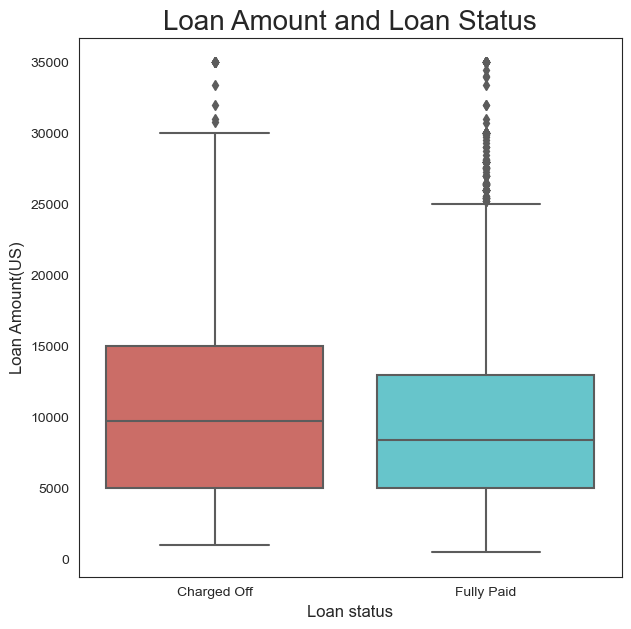

In [178]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="loan_amnt", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Loan Amount(US)", fontsize=12)
plt.title("Loan Amount and Loan Status", fontsize=20)

plt.show()

<font color='blue'>***Insights***</font>:
+ By observing the median and 3rd quartile people who took higher loan amount are likely to charge off 

## <font color='blue'>Relation between Loan Status and Loan Term

In [179]:
term_loanstatus = pd.crosstab(index=df_loan['term'], columns=df_loan['loan_status'], normalize=0).reset_index()
term_loanstatus

loan_status,term,Charged Off,Fully Paid
0,36 months,0.106806,0.893194
1,60 months,0.252747,0.747253


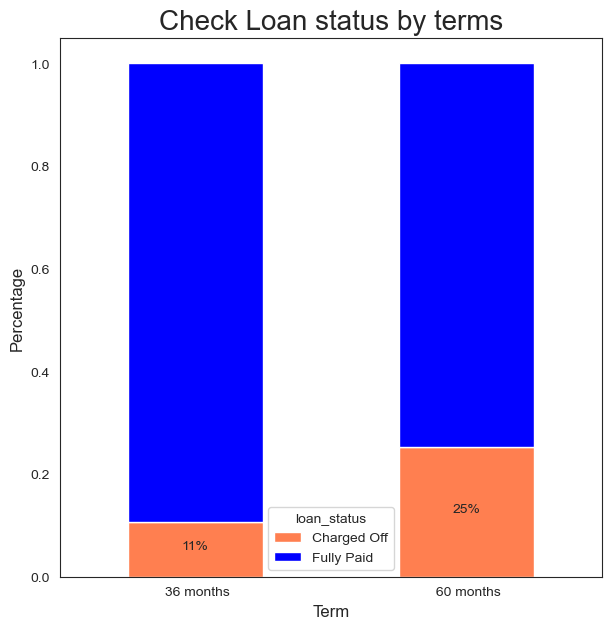

In [181]:
#create stacked bar chart
term_loanstatus.set_index('term').plot(kind='bar', stacked=True, color=['coral','blue'] ,figsize=(7,7))

for idx, row in term_loanstatus.iterrows():
    plt.text(idx-.05, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))

plt.xticks(rotation=0)

plt.xlabel("Term", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Check Loan status by terms", fontsize=20)

plt.show()

 <font color='black'>***Insights***</font>: 
+ The percentage of defaulters are higher in 60 months term with about 25% charge-off whereas it is just 11% for 36 month term
+ So, there is a possibility that longer term loans are more risky and prone to higher default

## <font color='blue'>Relation between Loan Status and Interest Rate

In [163]:
df_loan_intrest =df_loan.groupby('loan_status').agg({'int_rate': 'median'})

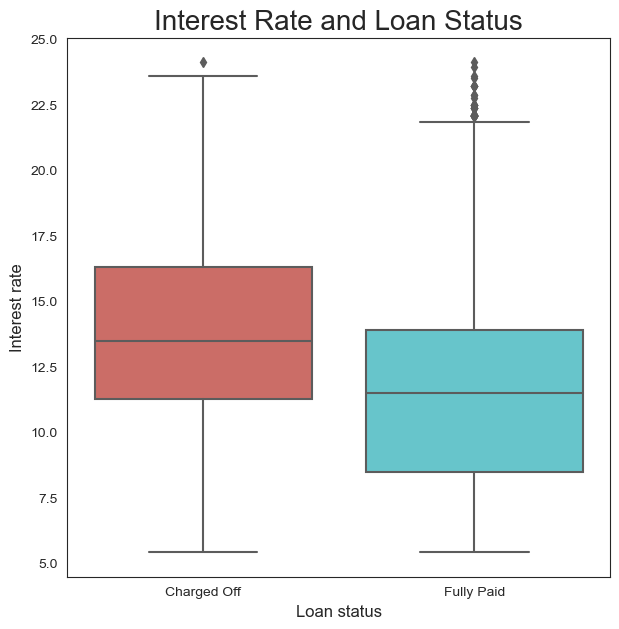

In [182]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="int_rate", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Interest rate", fontsize=12)
plt.title("Interest Rate and Loan Status", fontsize=20)


plt.show()

## <font color='blue'>Relation between Loan Status and Home Ownership

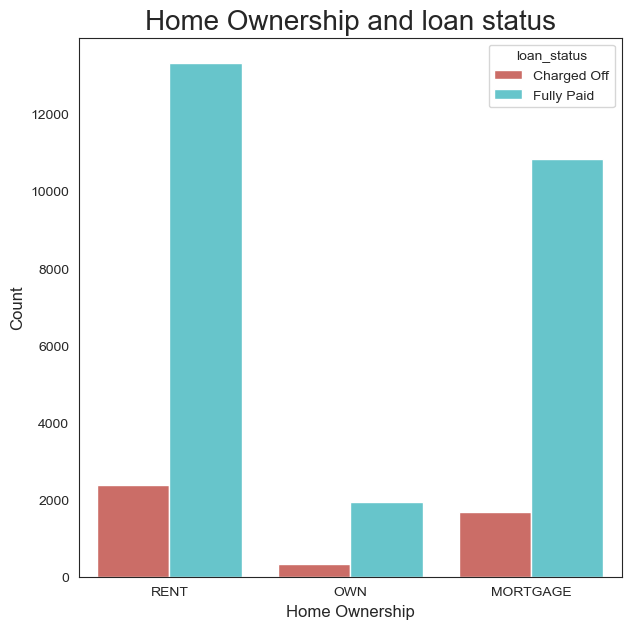

In [183]:
plt.figure(figsize = (7,7))


sns.countplot(x="home_ownership" ,data=df_loan, hue="loan_status" , palette="hls")
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Home Ownership and loan status", fontsize=20)


plt.show()

## <font color='blue'>Relation between Loan Status and monthly Installment Amount

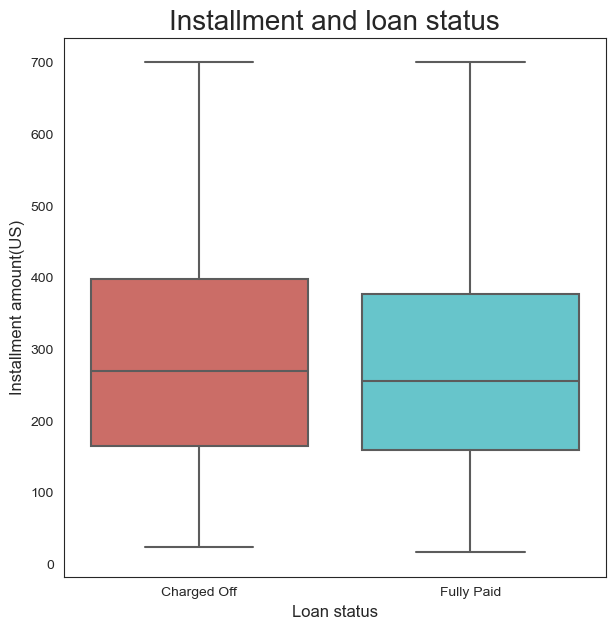

In [184]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="installment", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Installment amount(US)", fontsize=12)
plt.title("Installment and loan status", fontsize=20)


plt.show()

## <font color='blue'>Relation between Loan Status and grade of loan

In [185]:
grade_loanstatus = pd.crosstab(index=df_loan['grade'], columns=df_loan['loan_status'], normalize=0).reset_index()
grade_loanstatus

loan_status,grade,Charged Off,Fully Paid
0,A,0.059585,0.940415
1,B,0.121609,0.878391
2,C,0.172109,0.827891
3,D,0.219618,0.780382
4,E,0.273166,0.726834
5,F,0.322169,0.677831
6,G,0.389535,0.610465


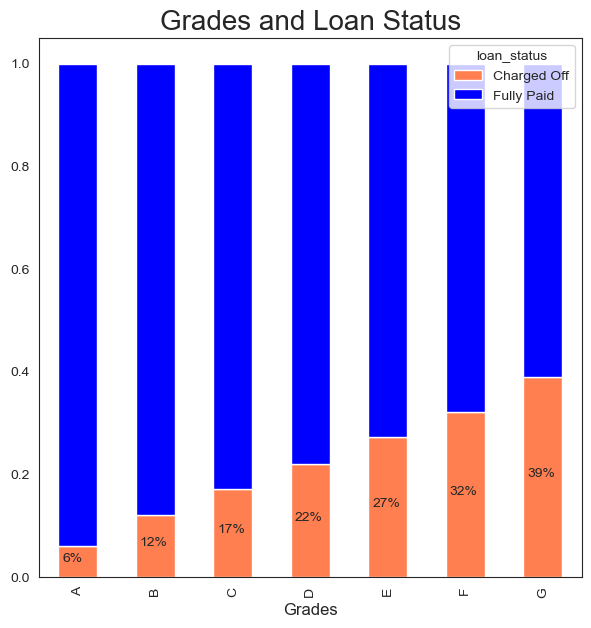

In [186]:

#create stacked bar chart
grade_loanstatus.set_index('grade').plot(kind='bar', stacked=True, color=['coral','blue'],figsize=(7,7))

for idx, row in grade_loanstatus.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
plt.xlabel("Grades", fontsize=12)
plt.title("Grades and Loan Status", fontsize=20)
plt.show()

## <font color='blue'>Relation between Loan Status and Employment Experience 

In [187]:
def bucket(x): # creating buckets for getting more insights
    if(x==0):
        return "Fresher"
    elif(x>=1 and x<3):
        return "1-3"
    elif(x>=3 and x<5):
        return "3-5"
    elif(x>=5 and x<7):
        return "5-7"
    elif(x>=7 and x<10):
        return "7-10"
    elif(x>=10):
        return "10+"
        

In [188]:
df_loan["emp_length_buckets"]=df_loan.emp_length.apply(bucket)

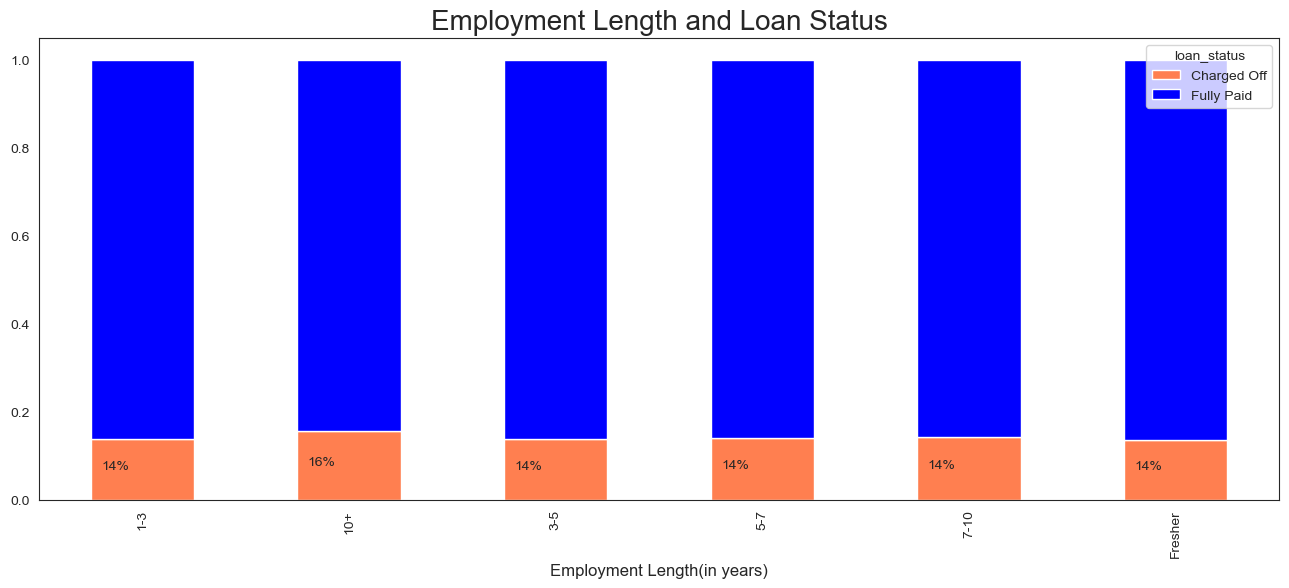

In [189]:
crosstab_emplen_status = pd.crosstab(index=df_loan['emp_length_buckets'], columns=df_loan['loan_status'], normalize=0).reset_index()
#create stacked bar chart

axes = crosstab_emplen_status.set_index('emp_length_buckets').plot(kind='bar', stacked=True, color=['coral','blue'])

# extract the figure object
fig = axes.get_figure()

for idx, row in crosstab_emplen_status.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 6))
plt.xlabel("Employment Length(in years)", fontsize=12)
plt.title("Employment Length and Loan Status", fontsize=20)
plt.show()

## <font color='blue'>Relation between Loan Status and Annual Income

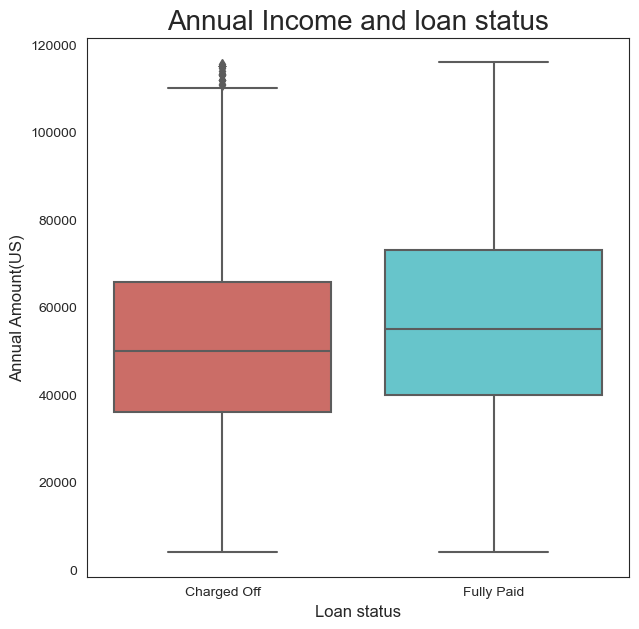

In [190]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="annual_inc", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Annual Amount(US)", fontsize=12)
plt.title("Annual Income and loan status", fontsize=20)


plt.show()

<font color='blue'>***Insights***</font>:
+ People with less income are more likely to default compared to more income. 

## <font color='blue'>Relation between Loan Status and Purpose

In [191]:
crosstab_purpose_status = pd.crosstab(index=df_loan['purpose'], columns=df_loan['loan_status'], normalize=0).reset_index()
crosstab_purpose_status

loan_status,purpose,Charged Off,Fully Paid
0,car,0.109049,0.890951
1,credit_card,0.105716,0.894284
2,debt_consolidation,0.151767,0.848233
3,educational,0.167969,0.832031
4,home_improvement,0.119843,0.880157
5,house,0.153846,0.846154
6,major_purchase,0.101983,0.898017
7,medical,0.157324,0.842676
8,moving,0.161290,0.838710
9,other,0.158333,0.841667


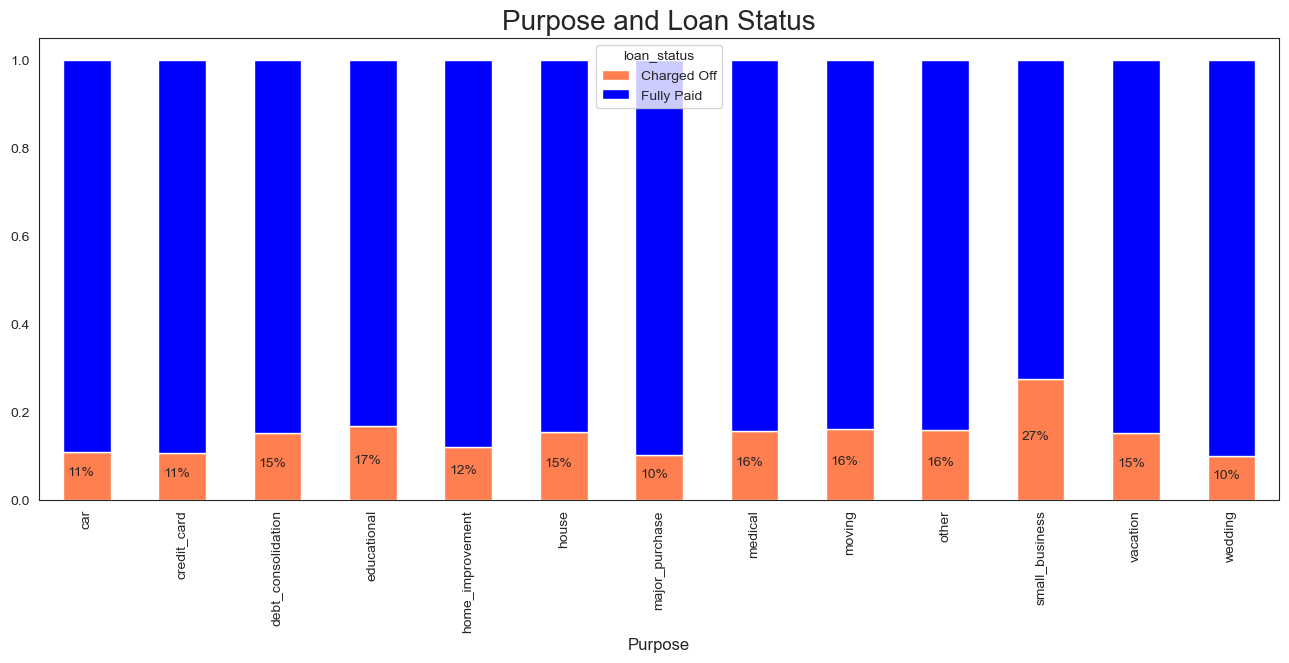

In [192]:
#create stacked bar chart

axes = crosstab_purpose_status.set_index('purpose').plot(kind='bar', stacked=True, color=['coral','blue'])

# extract the figure object
fig = axes.get_figure()

for idx, row in crosstab_purpose_status.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 6))
plt.xlabel("Purpose", fontsize=12)
plt.title("Purpose and Loan Status", fontsize=20)
plt.show()

<font color='blue'>***Insights***</font>:
+ Small business are more likely to charge off compared to other purpose as they are the 28% of people who charged off

## <font color='blue'>Relation between Loan Status and DTI Ratio

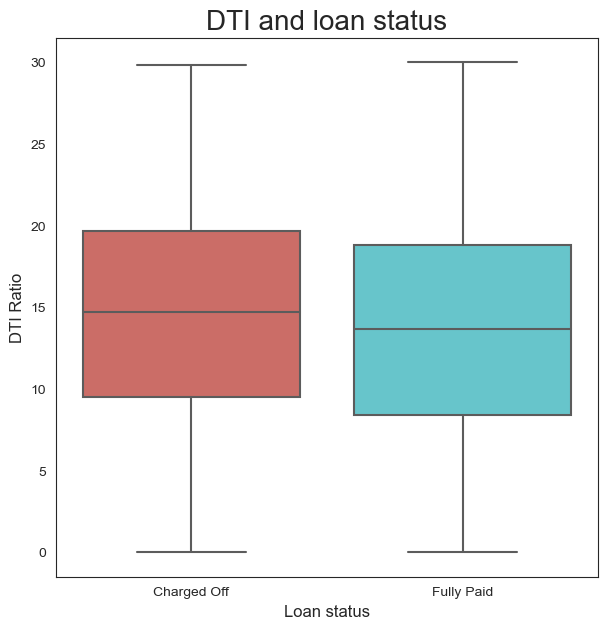

In [193]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="dti", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("DTI Ratio", fontsize=12)
plt.title("DTI and loan status", fontsize=20)


plt.show()

## <font color='blue'>Relation between public bankruptcies with loan status

In [194]:
bankrupt_loanstatus = pd.crosstab(index=df_loan['pub_rec_bankruptcies'], columns=df_loan['loan_status'], normalize=0).reset_index()
bankrupt_loanstatus

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid
0,0.0,0.139829,0.860171
1,1.0,0.211553,0.788447
2,2.0,0.400000,0.600000


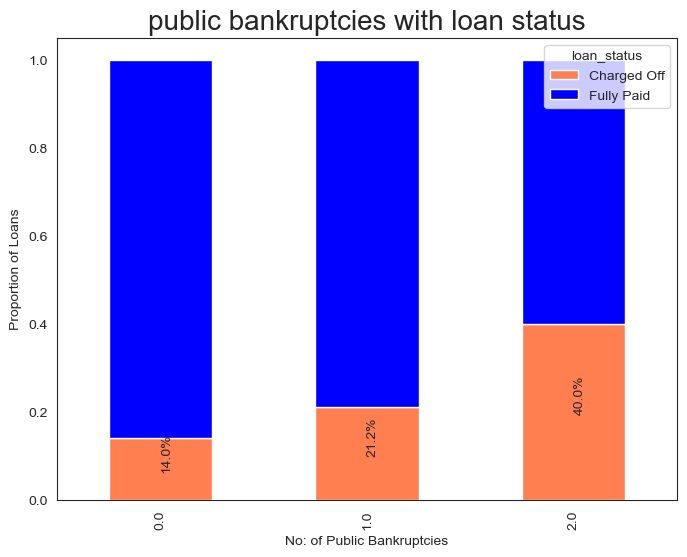

In [195]:
#creating stacked bar chart

axes = bankrupt_loanstatus.set_index('pub_rec_bankruptcies').plot(kind='bar', stacked=True, color=['coral','blue'])

# figure object extraction
fig = axes.get_figure()

for i, row in bankrupt_loanstatus.iterrows():
    plt.text(i, row['Charged Off']/2, "{:.1%}".format(row['Charged Off']), rotation=90)

plt.xlabel('No: of Public Bankruptcies')
plt.ylabel('Proportion of Loans')

fig.set_size_inches((8, 6))
plt.title("public bankruptcies with loan status", fontsize=20)
plt.show()

<font color='blue'>***Insights***</font>
+ As number of bankruptcies increases the charge off rate also increases